In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To check the file encoding using Chardet package
import chardet
with open('Data\drug.csv', 'rb') as f:
    result = chardet.detect(f.read())
result['encoding']

'ascii'

In [3]:
#Loading the file
df = pd.read_csv('Data\drug.csv', encoding= 'ascii')

In [4]:
#checking the top entried in the dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


There are 4 float feature, 1 integer feature and 4 Categorical features. 

In [7]:
df.duplicated().sum()

0

In [8]:
#to check the null values in the dataset
[feature for feature in df.columns if df[feature].isnull().sum()!=0]

[]

In [9]:
df['Age'].unique()

array([23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 50, 16, 69, 32, 57, 63,
       48, 33, 31, 39, 45, 18, 65, 53, 46, 15, 73, 58, 66, 37, 68, 67, 62,
       24, 26, 40, 38, 29, 17, 54, 70, 36, 19, 64, 59, 51, 42, 56, 20, 72,
       35, 52, 55, 30, 21, 25], dtype=int64)

In [10]:
#Age is between 15-74 years

In [11]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [12]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [13]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [14]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

## Questions for which we have to find the answers before applying any ML model.

1. How many of males are having high BP and Normal cholestrol
2. How many of female are having high BP and Normal cholestrol
3. How many of males are having low BP and high cholestrol
4. How many of female are having low BP and high cholestrol
5. How many of males are having Normal BP and high cholestrol
6. How many of males are having Normal BP and Normal cholestrol
7. How many of females are having Normal BP and Normal cholestrol
8. How many of females are having Normal BP and high cholestrol
9. What is the ratio of Males and females samples
10. Out of 200 entries of data, what percetage of people are having high colestrol
11. Out of 200 entries of data, what percetage of people are having normal colestrol
12. Out of 200 entries of data, what percetage of people are having high BP
13. Out of 200 entries of data, what percetage of people are having normal BP
14. Out of 200 entries of data, what percetage of people are having low BP
15. Visualize the data taking different types of drugs (A,B,C,X,Y)

In [15]:
# How many of males are having high BP and Normal cholestrol
(df[(df['BP'] == 'HIGH') & (df['Cholesterol'] == 'NORMAL')]['Sex'] == 'M').sum()

21

In [16]:
# How many of female are having high BP and Normal cholestrol
(df[(df['BP'] == 'HIGH') & (df['Cholesterol'] == 'NORMAL')]['Sex'] == 'F').sum()

21

In [17]:
# How many of males are having low BP and high cholestrol
(df[(df['BP'] == 'LOW') & (df['Cholesterol'] == 'HIGH')]['Sex'] == 'M').sum()

17

In [18]:
# How many of female are having low BP and high cholestrol
(df[(df['BP'] == 'LOW') & (df['Cholesterol'] == 'HIGH')]['Sex'] == 'F').sum()

14

In [19]:
# How many of males are having Normal BP and high cholestrol
(df[(df['BP'] == 'NORMAL') & (df['Cholesterol'] == 'HIGH')]['Sex'] == 'M').sum()

19

In [20]:
# How many of males are having Normal BP and Normal cholestrol
(df[(df['BP'] == 'NORMAL') & (df['Cholesterol'] == 'NORMAL')]['Sex'] == 'M').sum()

10

In [21]:
# How many of females are having Normal BP and Normal cholestrol
(df[(df['BP'] == 'NORMAL') & (df['Cholesterol'] == 'NORMAL')]['Sex'] == 'F').sum()

12

In [22]:
# How many of females are having Normal BP and high cholestrol
(df[(df['BP'] == 'NORMAL') & (df['Cholesterol'] == 'HIGH')]['Sex'] == 'F').sum()

18

#### Observations:
1. 21 Males are having High BP & Normal cholestrol 
2. 21 Females are having High BP & Normal cholestrol 
3. 17 males are having low BP & high cholestrol
4. 14 Females are having low BP and high cholestrol
5. 19 males are having Normal BP and high cholestrol
6. 10 males are having Normal BP and Normal cholestrol
7. 12 Females are having Normal BP and Normal cholestrol
8. 18 females are having Normal BP and high cholestrol

In [23]:
# What is the ratio of Males and females samples
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

##### Observation:
1. There are total 200 entries in the data, where 104 people are Males and 96 are females.

In [24]:
# Out of 200 entries of data, what percetage of people are having high colestrol
High_colestrol = (df['Cholesterol'] == 'HIGH').sum()
percentage = High_colestrol/200 *100
percentage

51.5

In [25]:
# Out of 200 entries of data, what percetage of people are having normal colestrol
Normal_colestrol = (df['Cholesterol'] == 'NORMAL').sum()
percentage = Normal_colestrol/200 *100
percentage

48.5

##### Observation:
1. 48.5% of population is having normal colestrol.
2. 51.5% of the population is having high colestrol.

In [26]:
# Out of 200 entries of data, what percetage of people are having high BP
High_BP = (df['BP'] == 'HIGH').sum()
percentage = High_BP/200 *100
percentage

38.5

In [27]:
# Out of 200 entries of data, what percetage of people are having normal BP
NORMAL_BP = (df['BP'] == 'NORMAL').sum()
percentage = NORMAL_BP/200 *100
percentage

29.5

In [28]:
# Out of 200 entries of data, what percetage of people are having low BP
LOW_BP = (df['BP'] == 'LOW').sum()
percentage = NORMAL_BP/200 *100
percentage

29.5

##### Observation:
1. Population having 29.5% Low BP and Normal BP.
2. 38.5% of the population is having High BP.

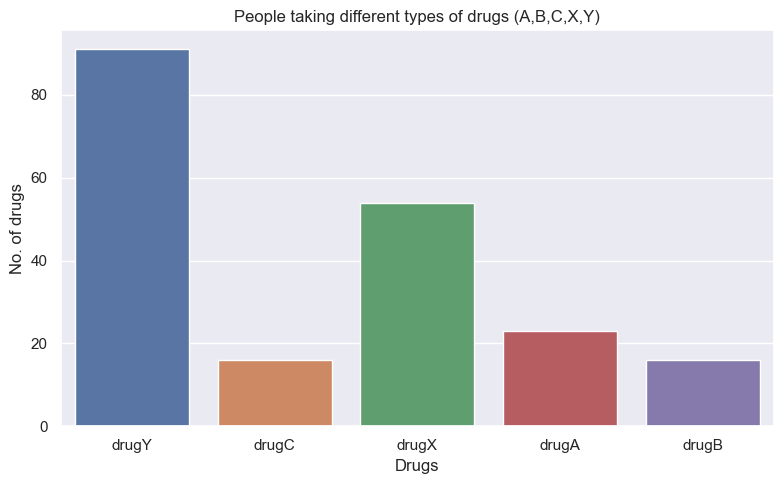

In [29]:
# Visualize the data taking different types of drugs (A,B,C,X,Y)
sns.set(rc = {'figure.figsize': (8,5)})
sns.countplot(data=df, x = 'Drug')
plt.xlabel("Drugs")
plt.ylabel("No. of drugs")
plt.title("People taking different types of drugs (A,B,C,X,Y)")
plt.tight_layout()
plt.show()

#### Observation:
1. There are 80+ people taking DrugY
2. There are 50+ people taking DrugX
3. There are 20+ people taking DrugA
4. DrugC and DrugB plot shows equal number of people taking it.
5. Top 3 drugs are DrugY, DrugX and DrugA

In [30]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])

In [32]:
df1 = pd.get_dummies(df['BP'])
df = pd.concat((df, df1), axis=1)
df.drop('BP', axis=1, inplace = True)
df.rename({'HIGH' : "BP_High", 'LOW': 'BP_Low', 'Normal': 'BP_Normal'}, axis = 1, inplace = True)
df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_High,BP_Low,NORMAL
0,23,0,0,25.355,drugY,1,0,0
1,47,1,0,13.093,drugC,0,1,0
2,47,1,0,10.114,drugC,0,1,0
3,28,0,0,7.798,drugX,0,0,1
4,61,0,0,18.043,drugY,0,1,0


## Decision Tree and Random Forest Machine Learning Model

In [33]:
X= df.drop('Drug', axis =1)
y= df['Drug']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
pred_data = DT.predict(X_test)

In [36]:
accuracy_score(y_test, pred_data)

1.0

In [37]:
Pred_train = DT.predict(X_train)
accuracy_score(y_train, Pred_train)

1.0

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_data))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        29

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_data)

array([[ 8,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 29]], dtype=int64)

Text(0.5, 1.0, 'Accuracy score: 1.0')

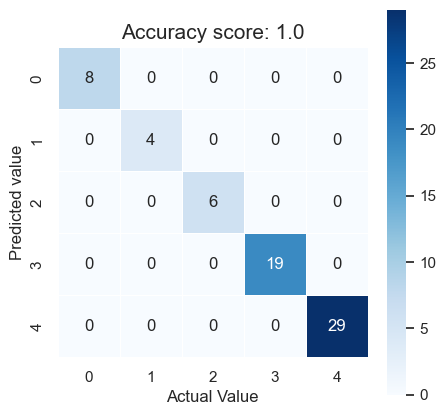

In [40]:
cm=confusion_matrix(y_test, pred_data)
plt.figure(figsize=(5,5))
sns.heatmap(cm,square=True,cmap='Blues',linewidth=0.5,annot=True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')
title='Accuracy score: {0}'.format(accuracy_score(y_test, pred_data))
plt.title(title,size=15)

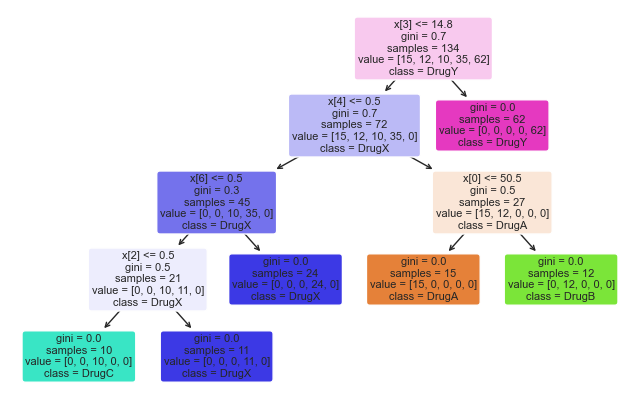

In [41]:
tree = plot_tree(decision_tree=DT, class_names=['DrugA','DrugB','DrugC','DrugX','DrugY'], rounded=True,filled=True, precision=True)

## we see Gini is more than 0.5, this is due to multi-class

In [42]:
df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_High,BP_Low,NORMAL
0,23,0,0,25.355,drugY,1,0,0
1,47,1,0,13.093,drugC,0,1,0
2,47,1,0,10.114,drugC,0,1,0
3,28,0,0,7.798,drugX,0,0,1
4,61,0,0,18.043,drugY,0,1,0


In [43]:
df['Drug'] = encoder.fit_transform(df['Drug'])

### Logistics Regression ML Model

In [44]:
from sklearn.linear_model import LogisticRegression
# Using One-vs-Rest (OvR) logistic regression
ovr_classifier = LogisticRegression(multi_class='ovr', solver='liblinear')
ovr_classifier.fit(X_train, y_train)
ovr_predictions = ovr_classifier.predict(X_test)
ovr_accuracy = accuracy_score(y_test, ovr_predictions)
print("Accuracy (OvR):", ovr_accuracy)



Accuracy (OvR): 0.9090909090909091


In [45]:
# Using One-vs-Rest (OvR) logistic regression
ovr_classifier = LogisticRegression(multi_class='ovr', solver='liblinear')
ovr_classifier.fit(X_train, y_train)
ovr_predictions = ovr_classifier.predict(X_test)
ovr_accuracy = accuracy_score(y_test, ovr_predictions)
print("Accuracy (OvR):", ovr_accuracy)

Accuracy (OvR): 0.9090909090909091


In [46]:
# Using Softmax Regression (Multinomial Logistic Regression)
softmax_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_classifier.fit(X_train, y_train)
softmax_predictions = softmax_classifier.predict(X_test)
softmax_accuracy = accuracy_score(y_test, softmax_predictions)
print("Accuracy (Softmax):", softmax_accuracy)

Accuracy (Softmax): 0.9090909090909091


### Support Vector Machines (SVC) ML Model

In [47]:
from sklearn.svm import SVC
# Create an SVC classifier
clf = SVC(kernel='linear')  # You can choose different kernels

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("With Linear kernel, Accuracy:", accuracy)

With Linear kernel, Accuracy: 0.9848484848484849


In [48]:
# Create an SVC classifier
clf = SVC(kernel='rbf')  # You can choose different kernels

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("With rbf kernel, Accuracy:", accuracy)

With rbf kernel, Accuracy: 0.7272727272727273


In [49]:
# Create an SVC classifier
clf = SVC(kernel='poly')  # You can choose different kernels

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("With poly kernel, Accuracy:", accuracy)

With poly kernel, Accuracy: 0.6515151515151515


In [50]:
# Create an SVC classifier
clf = SVC(kernel='sigmoid')  # You can choose different kernels

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("With sigmoid kernel, Accuracy:", accuracy)

With sigmoid kernel, Accuracy: 0.4090909090909091


### We are getting best results and predictions by using Decision Tree ML model, There could be a reason that due to small dataset it is givinging higher accuracy.